In [10]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h4>{title}</h4>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Existencias

In [11]:
EX = pd.read_csv("/home/jovyan/Proyecto/Data/ExistenciasNew.csv")
EX.head()

,DEPARTAMENTO,SUBCATEGORIA,REF_Combinada,Referencia,Ext. 1 detalle,Ext. 2 detalle,Disp.
0,P001 - COMEDORES,BIBL - BIBLIOTECAS,XA0669:00189:,XA0669,189.0,NaN,2
1,P001 - COMEDORES,BIFT - BIFFET,BR0031:00198:,BR0031,198.0,NaN,32
2,P001 - COMEDORES,BIFT - BIFFET,XA0543:00183:,XA0543,183.0,NaN,5
3,P001 - COMEDORES,BIFT - BIFFET,XA0698:00183:,XA0698,183.0,NaN,2
4,P001 - COMEDORES,BIFT - BIFFET,XC0041:00001:,XC0041,1.0,NaN,60


In [12]:
EX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DEPARTAMENTO    941 non-null    object 
 1   SUBCATEGORIA    941 non-null    object 
 2   REF_Combinada   941 non-null    object 
 3   Referencia      941 non-null    object 
 4   Ext. 1 detalle  877 non-null    float64
 5   Ext. 2 detalle  75 non-null     float64
 6   Disp.           941 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 51.6+ KB


####  - DEPARTAMENTO

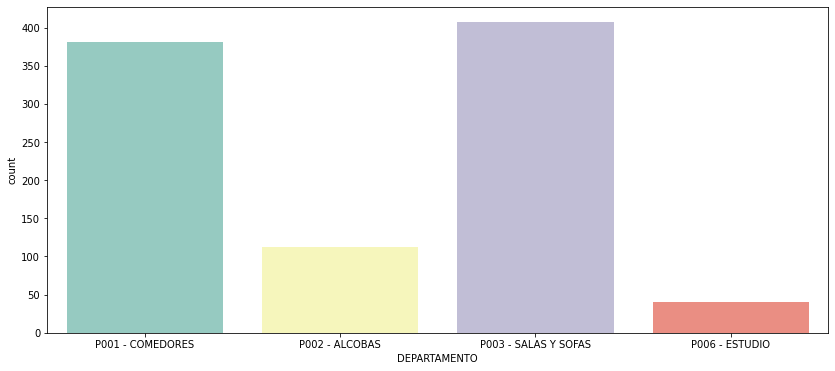

In [13]:
fig, axes = plt.subplots(figsize = (14,6))
sns.countplot(x="DEPARTAMENTO", data=EX, palette="Set3")
plt.show()

####  - SUBCATEGORIA

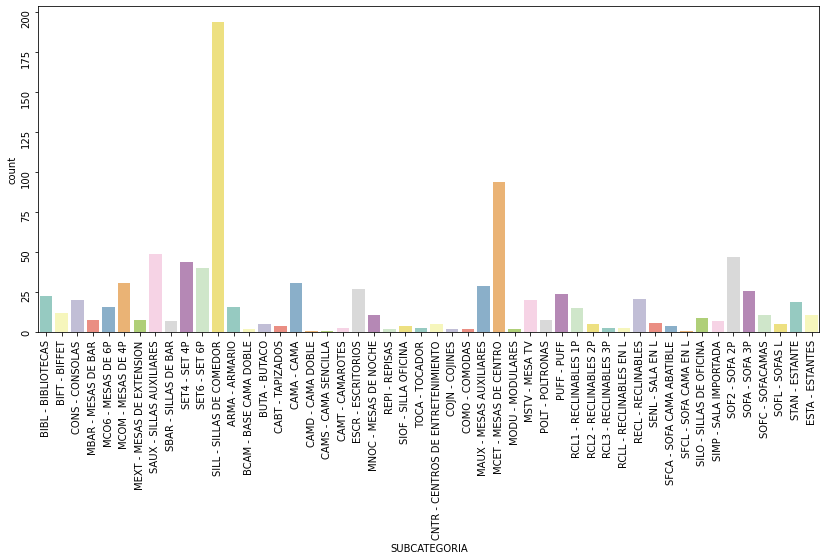

In [14]:
fig, axes = plt.subplots(figsize = (14,6))
sns.countplot(x="SUBCATEGORIA", data=EX, palette="Set3")
axes.tick_params(labelrotation = 90)

####  - Ext. 1 detalle

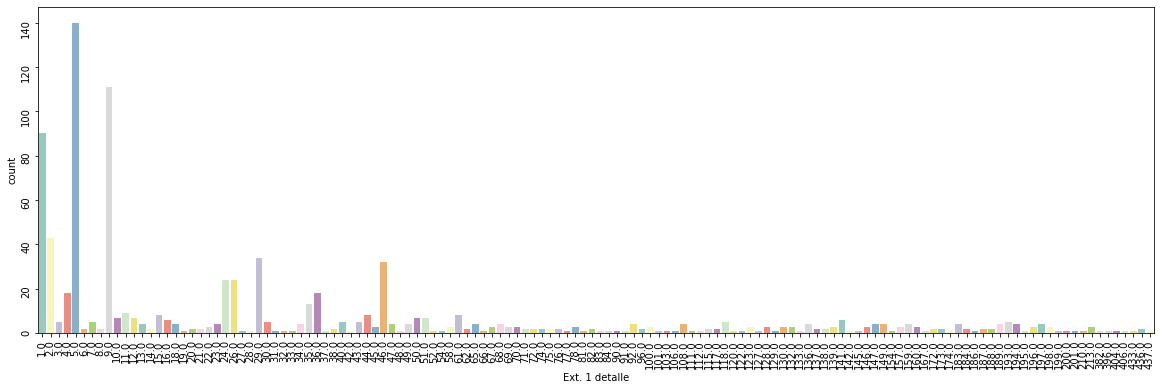

In [15]:
fig, axes = plt.subplots(figsize = (20,6))
sns.countplot(x="Ext. 1 detalle", data=EX, palette="Set3")
axes.tick_params(labelrotation = 90)

####  - Disponibilidad

In [16]:
EX['Disp.'].describe()

count    941.000000
mean      13.175345
std       21.870899
min        1.000000
25%        3.000000
50%        5.000000
75%       14.000000
max      239.000000
Name: Disp., dtype: float64

## FACTURACION

In [17]:
FACT = pd.read_csv("/home/jovyan/Proyecto/Data/FacturacionCorregida.csv",sep=";",parse_dates=['Fecha']) 
FACT.head()

,C.O.,Desc. C.O.,REF_Combinada,Nro documento,Fecha,Cantidad inv.,Suma de Vlr_Bruto,Suma de Vlr_Subtotal
0,11,ADMINISTRACION,XZ0862:00005:,FSV-00001071,2019-01-17,1,188922,75569
1,11,ADMINISTRACION,XA0574:00002:,FSV-00001072,2019-01-17,1,1241100,434385
2,11,ADMINISTRACION,XZ0686:00004:,FSV-00001073,2019-01-18,1,385318,96330
3,11,ADMINISTRACION,XZ0686:00004:,FSV-00001074,2019-01-18,1,385318,96330
4,11,ADMINISTRACION,XA0539:00061:,FSV-00001075,2019-01-21,1,722688,722688


In [18]:
FACT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36276 entries, 0 to 36275
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   C.O.                  36276 non-null  int64         
 1   Desc. C.O.            36276 non-null  object        
 2   REF_Combinada         36276 non-null  object        
 3   Nro documento         36276 non-null  object        
 4   Fecha                 36276 non-null  datetime64[ns]
 5   Cantidad inv.         36276 non-null  int64         
 6   Suma de Vlr_Bruto     36276 non-null  int64         
 7   Suma de Vlr_Subtotal  36276 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.2+ MB


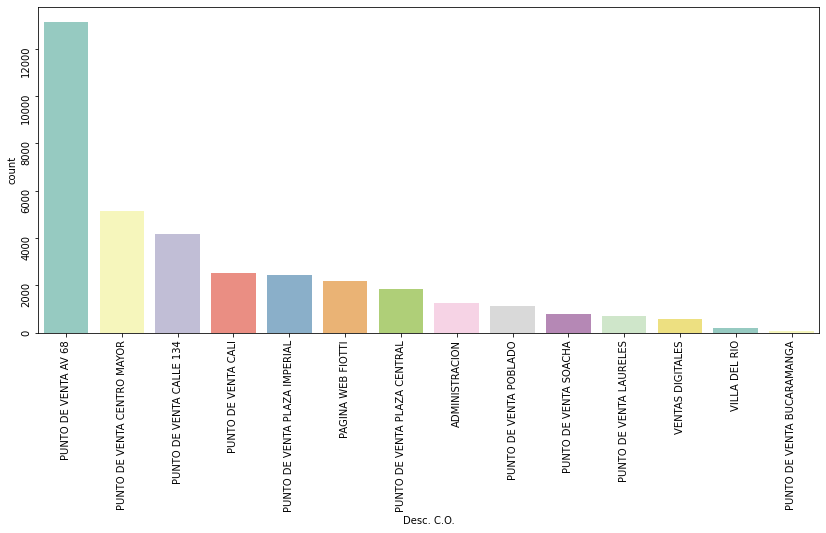

In [19]:
fig, axes = plt.subplots(figsize = (14,6))
sns.countplot(x="Desc. C.O.", data=FACT, 
              palette="Set3",
              order = FACT["Desc. C.O."].value_counts().index)
axes.tick_params(labelrotation = 90)
plt.show()

## MAESTRO

In [20]:
MAESTRO = pd.read_csv("/home/jovyan/Proyecto/Data/MaestroCorregido.csv",sep=";") 
MAESTRO.head()

,Item,Desc. item,Desc. ext. 1 detalle,Desc. ext. 2 detalle,Desc. tipo inventario,ORIGEN,DEPARTAMENTO,SUBCATEGORIA,ESTILO,VIGENCIA,001-DESCRIPCION UNIFICADA,001-ALTO EXHIBIDO,001-ANCHO EXHIBIDO,001-FONDO EXHIBIDO,001-MATERIAL PPAL,001-ACABADO,REF_Combinada,COLOR DEF,Puestos
0,11057,SILLA COMEDOR 85-1062 NG NO GARANTIA,C.NEGRO,NaN,MCIA NO FABRICADA IMPORTADA,IMP - IMPORTADO,P001 - COMEDORES,SILL - SILLAS DE COMEDOR,MOD - MODERNO,002 - DESCONTINUADO,SILLA COMEDOR 85,77.0,40.0,47.0,Sintético,Superficies mates,A01040:00005:,NEGRO,1 Puesto
1,19389,ESTANTE PRAIA 1 GAV RT3091 BL/RUST,C.BL/RUST,NaN,MCIA NO FABRICADA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,ESTA - ESTANTES,CON - CONTEMPORÁNEO,003 - NOVEDAD,ESTANTE PRAIA,180.0,41.0,63.0,madera laminada,Mate,BR0002:00193:,BLANCO/RUSTICO,No Aplica
2,19390,ESTANTE PRAIA 1 GAV RT3091 NG/RUST,C.NG/RUST,NaN,MCIA NO FABRICADA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,ESTA - ESTANTES,CON - CONTEMPORÁNEO,003 - NOVEDAD,ESTANTE PRAIA,180.0,41.0,63.0,madera laminada,Mate,BR0003:00194:,NEGRO/RUSTICO,No Aplica
3,19391,ESCRITORIO RETRO L PARANA RT3077 BL/RUST,C.BL/RUST,NaN,MCIA NO FABRICADA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,ESCR - ESCRITORIOS,CON - CONTEMPORÁNEO,003 - NOVEDAD,ESCRITORIO RETRO L PARANA,78.0,136.0,108.0,madera laminada,Mate,BR0004:00193:,BLANCO/RUSTICO,No Aplica
4,19392,ESCRITORIO RETRO VITORIA RT3067 BL/RUST,C.BL/RUST,NaN,MCIA NO FABRICADA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,ESCR - ESCRITORIOS,CON - CONTEMPORÁNEO,003 - NOVEDAD,ESCRITORIO RETRO VITORIA,77.0,130.0,60.0,madera laminada,Mate,BR0005:00193:,BLANCO/RUSTICO,No Aplica


In [25]:
MAESTRO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item                       1285 non-null   int64  
 1   Desc. item                 1285 non-null   object 
 2   Desc. ext. 1 detalle       1235 non-null   object 
 3   Desc. ext. 2 detalle       466 non-null    object 
 4   Desc. tipo inventario      1285 non-null   object 
 5   ORIGEN                     1285 non-null   object 
 6   DEPARTAMENTO               1285 non-null   object 
 7   SUBCATEGORIA               1285 non-null   object 
 8   ESTILO                     1285 non-null   object 
 9   VIGENCIA                   1285 non-null   object 
 10  001-DESCRIPCION UNIFICADA  1285 non-null   object 
 11  001-ALTO EXHIBIDO          1285 non-null   float64
 12  001-ANCHO EXHIBIDO         1285 non-null   float64
 13  001-FONDO EXHIBIDO         1285 non-null   float

In [26]:
FACT_COL = FACT.set_index('REF_Combinada').join(MAESTRO.set_index('REF_Combinada'))
FACT_COL.head()

,C.O.,Desc. C.O.,Nro documento,Fecha,Cantidad inv.,Suma de Vlr_Bruto,Suma de Vlr_Subtotal,Item,Desc. item,Desc. ext. 1 detalle,...,ESTILO,VIGENCIA,001-DESCRIPCION UNIFICADA,001-ALTO EXHIBIDO,001-ANCHO EXHIBIDO,001-FONDO EXHIBIDO,001-MATERIAL PPAL,001-ACABADO,COLOR DEF,Puestos
REF_Combinada,,,,,,,,,,,,,,,,,,,,,
A01040:00005:,100,PUNTO DE VENTA AV 68,FVP-00019041,2019-02-19,4,580841,203294,11057,SILLA COMEDOR 85-1062 NG NO GARANTIA,C.NEGRO,...,MOD - MODERNO,002 - DESCONTINUADO,SILLA COMEDOR 85,77.0,40.0,47.0,Sintético,Superficies mates,NEGRO,1 Puesto
A01040:00005:,100,PUNTO DE VENTA AV 68,FVP-00019043,2019-02-19,4,580841,203294,11057,SILLA COMEDOR 85-1062 NG NO GARANTIA,C.NEGRO,...,MOD - MODERNO,002 - DESCONTINUADO,SILLA COMEDOR 85,77.0,40.0,47.0,Sintético,Superficies mates,NEGRO,1 Puesto
A01040:00005:,100,PUNTO DE VENTA AV 68,FVP-00019095,2019-02-21,6,871261,304942,11057,SILLA COMEDOR 85-1062 NG NO GARANTIA,C.NEGRO,...,MOD - MODERNO,002 - DESCONTINUADO,SILLA COMEDOR 85,77.0,40.0,47.0,Sintético,Superficies mates,NEGRO,1 Puesto
A01040:00005:,100,PUNTO DE VENTA AV 68,FVP-00019419,2019-08-03,4,580841,203294,11057,SILLA COMEDOR 85-1062 NG NO GARANTIA,C.NEGRO,...,MOD - MODERNO,002 - DESCONTINUADO,SILLA COMEDOR 85,77.0,40.0,47.0,Sintético,Superficies mates,NEGRO,1 Puesto
A01040:00005:,100,PUNTO DE VENTA AV 68,FVP-00019429,2019-09-03,6,871261,304942,11057,SILLA COMEDOR 85-1062 NG NO GARANTIA,C.NEGRO,...,MOD - MODERNO,002 - DESCONTINUADO,SILLA COMEDOR 85,77.0,40.0,47.0,Sintético,Superficies mates,NEGRO,1 Puesto


In [27]:
FACT_COL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36406 entries, A01040:00005: to XZ0993:00100:
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   C.O.                       36406 non-null  int64         
 1   Desc. C.O.                 36406 non-null  object        
 2   Nro documento              36406 non-null  object        
 3   Fecha                      36406 non-null  datetime64[ns]
 4   Cantidad inv.              36406 non-null  int64         
 5   Suma de Vlr_Bruto          36406 non-null  int64         
 6   Suma de Vlr_Subtotal       36406 non-null  int64         
 7   Item                       36406 non-null  int64         
 8   Desc. item                 36406 non-null  object        
 9   Desc. ext. 1 detalle       35577 non-null  object        
 10  Desc. ext. 2 detalle       7403 non-null   object        
 11  Desc. tipo inventario      36406 non-null  object   

### - COLORES

##### 1. Colores mas vendidos

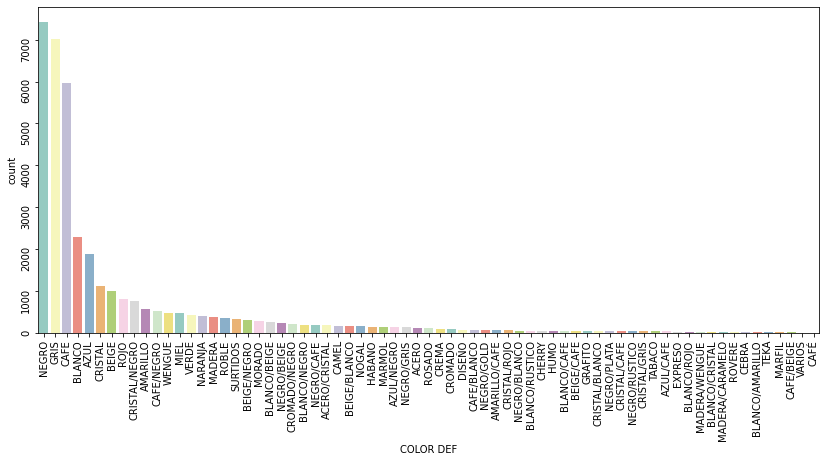

In [28]:
fig, axes = plt.subplots(figsize = (14,6))
sns.countplot(x="COLOR DEF",
              data=FACT_COL, 
              order = FACT_COL["COLOR DEF"].value_counts().index,
              palette="Set3")
axes.tick_params(labelrotation = 90)
plt.show()

In [29]:
df1 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA AV 68"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df2 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA CENTRO MAYOR"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df3 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA CALLE 134"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df4 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA CALI"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df5 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA PLAZA IMPERIAL"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()


display_side_by_side(df1,df2,df3,df4,df5, titles=["AV 68","CENTRO MAYOR","CALLE 134","CALI","PLAZA IMPERIAL"]) 


,COLOR DEF
NEGRO,0.202079
GRIS,0.193201
CAFE,0.160191
BLANCO,0.061466
AZUL,0.054409
,COLOR DEF
NEGRO,0.240403
CAFE,0.180884
GRIS,0.169833
BLANCO,0.058938


In [30]:
df1 = FACT_COL[FACT_COL["Desc. C.O."] == "PAGINA WEB FIOTTI"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df2 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA PLAZA CENTRAL"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df3 = FACT_COL[FACT_COL["Desc. C.O."] == "ADMINISTRACION"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df4 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA POBLADO"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df5 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA SOACHA"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()


display_side_by_side(df1,df2,df3,df4,df5, titles=["WEB FIOTTI","PLAZA CENTRAL","ADMINISTRACION","POBLADO","SOACHA"]) 

,COLOR DEF
NEGRO,0.257947
CAFE,0.150318
GRIS,0.123524
BLANCO,0.102634
CRISTAL/NEGRO,0.047230
,COLOR DEF
GRIS,0.208021
NEGRO,0.189305
CAFE,0.152406
AZUL,0.053476


In [31]:
df1 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA LAURELES"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df2 = FACT_COL[FACT_COL["Desc. C.O."] == "VENTAS DIGITALES"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df3 = FACT_COL[FACT_COL["Desc. C.O."] == "VILLA DEL RIO"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()
df4 = FACT_COL[FACT_COL["Desc. C.O."] == "PUNTO DE VENTA BUCARAMANGA"]["COLOR DEF"].value_counts(normalize=True).head().to_frame()

display_side_by_side(df1,df2,df3,df4, titles=["LAURELES","VENTAS DIGITALES","VILLA DEL RIO","BUCARAMANGA"]) 

,COLOR DEF
GRIS,0.241012
NEGRO,0.149134
CAFE,0.134487
AZUL,0.069241
BLANCO,0.063915
,COLOR DEF
NEGRO,0.264151
CAFE,0.214408
BLANCO,0.123499
GRIS,0.123499


##### 2. Ventas de productos por colores por meses

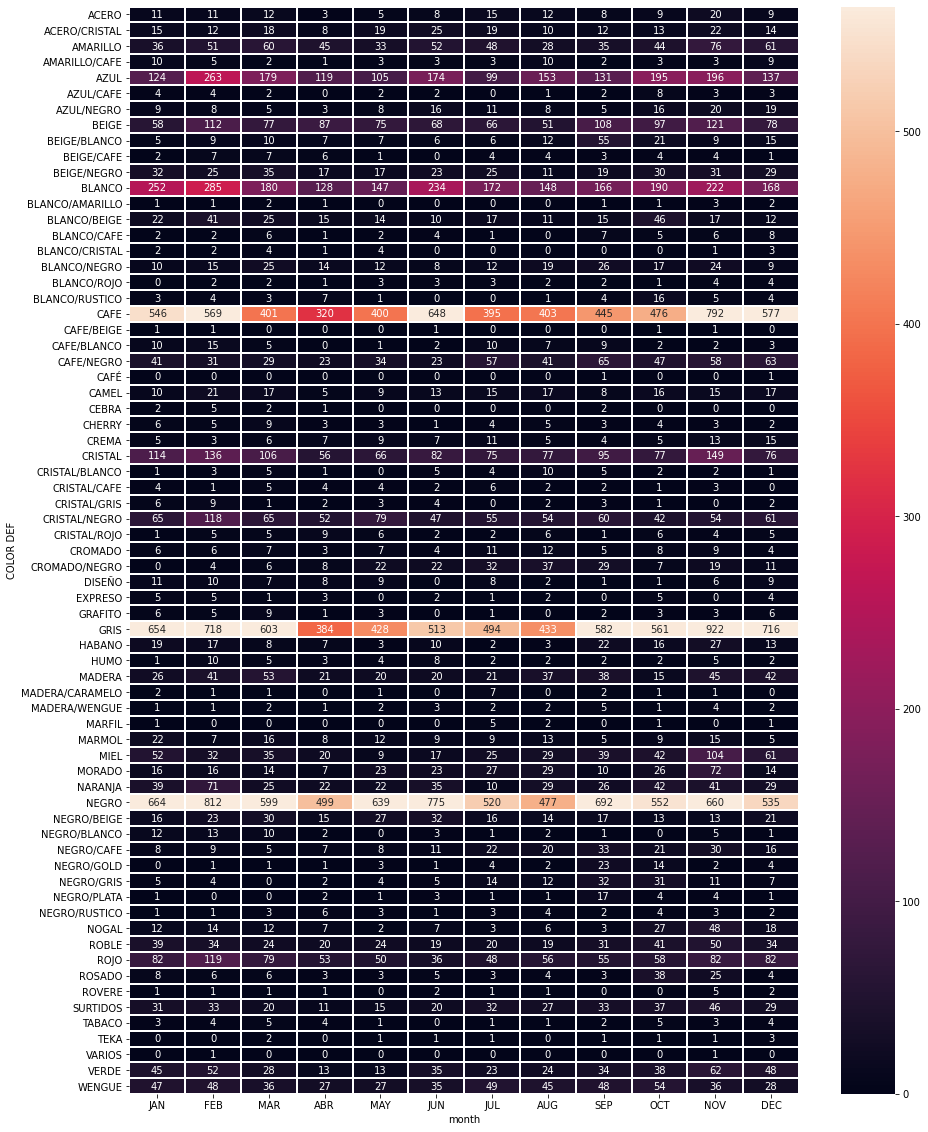

In [32]:
from pandas.api.types import CategoricalDtype
#DICT TO REPLACE NUMBERS FOR MONTHS NAMES
months = ["JAN","FEB","MAR","ABR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
to_months = {1:"JAN",2:"FEB",3:"MAR",4:"ABR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"}
FACT_COL['month'] = FACT_COL['Fecha'].dt.month
hm_data = FACT_COL.groupby(['month','COLOR DEF']).size().reset_index(name = "ventas")
hm_data['month'] =  hm_data['month'].replace(to_months).astype(CategoricalDtype(categories=months, ordered=True))
hm_data = hm_data.pivot(index = 'COLOR DEF',columns = 'month',values = 'ventas').fillna(0)

fig, ax = plt.subplots(figsize=(15,20))
ax = sns.heatmap(hm_data,annot = True,fmt='g',robust = True,linewidths=.1)

##### 3. Ventas por mes-año por color

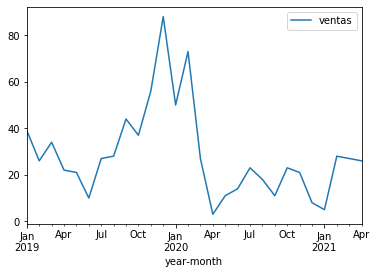

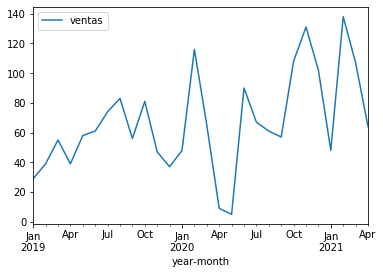

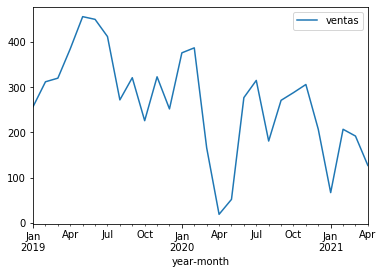

In [171]:
RED = FACT_COL[FACT_COL["COLOR DEF"] == "ROJO"].groupby(['year-month']).size().reset_index(name = "ventas")
BLUE = FACT_COL[FACT_COL["COLOR DEF"] == "AZUL"].groupby(['year-month']).size().reset_index(name = "ventas")
NEGRO = FACT_COL[FACT_COL["COLOR DEF"] == "NEGRO"].groupby(['year-month']).size().reset_index(name = "ventas")

RED.plot(x = "year-month", y= "ventas")
BLUE.plot(x = "year-month", y= "ventas")
NEGRO.plot(x = "year-month", y= "ventas")

plt.show()